<a href="https://colab.research.google.com/github/bbcx-investments/notebooks/blob/main/capm/capm_costequity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
sns.set_style('whitegrid')
!pip install --upgrade pandas-datareader
from pandas_datareader import DataReader as pdr


# get monthly market excess return and risk-free rate for past 60 months from French's data library
ff = pdr('F-F_Research_Data_Factors','famafrench',start=2017)[0]
ff = ff.iloc[-60:]

# get mean annual market excess return since 1926 from French's data library
mprem = pdr('F-F_Research_Data_Factors','famafrench',start=1926)[1]['Mkt-RF'].mean()

# get current 10-year Treasury bond yield from FRED
rf = pdr('DGS10','fred',start=2022).iloc[-1].item()

CVX cost of equity is 12.639586138354561 



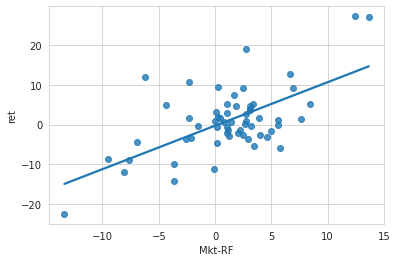

In [ ]:
# example ticker
ticker = 'CVX'

# compute monthly returns from Yahoo data
# put returns in percent form to match French and FRED data
data = pdr(ticker,'yahoo',start=2016)
close = data['Adj Close'].resample('M').last()
ret = 100*close.pct_change()
ret.name = 'ret'

# merge with French data, reducing to 60 months in the process
ret.index = ret.index.to_period('M')
df = ff.join(ret,how='left')

# compute excess returns for the ticker 
df['ret'] -= df.RF

# run regression of excess return on market excess return and get beta
result = sm.OLS(df.ret,sm.add_constant(df['Mkt-RF'])).fit()
beta = result.params['Mkt-RF']

# compute cost of equity
print(ticker,'cost of equity is',rf+beta*mprem,'\n')

# plot regression
sns.regplot(data=df,x='Mkt-RF',y='ret',ci=None)